In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#Standartization
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#data read and 5 lines of data shown
data = pd.read_csv("bank-full.csv", delimiter=";",header='infer')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#The data was checked for null values and general information about the data was obtained.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


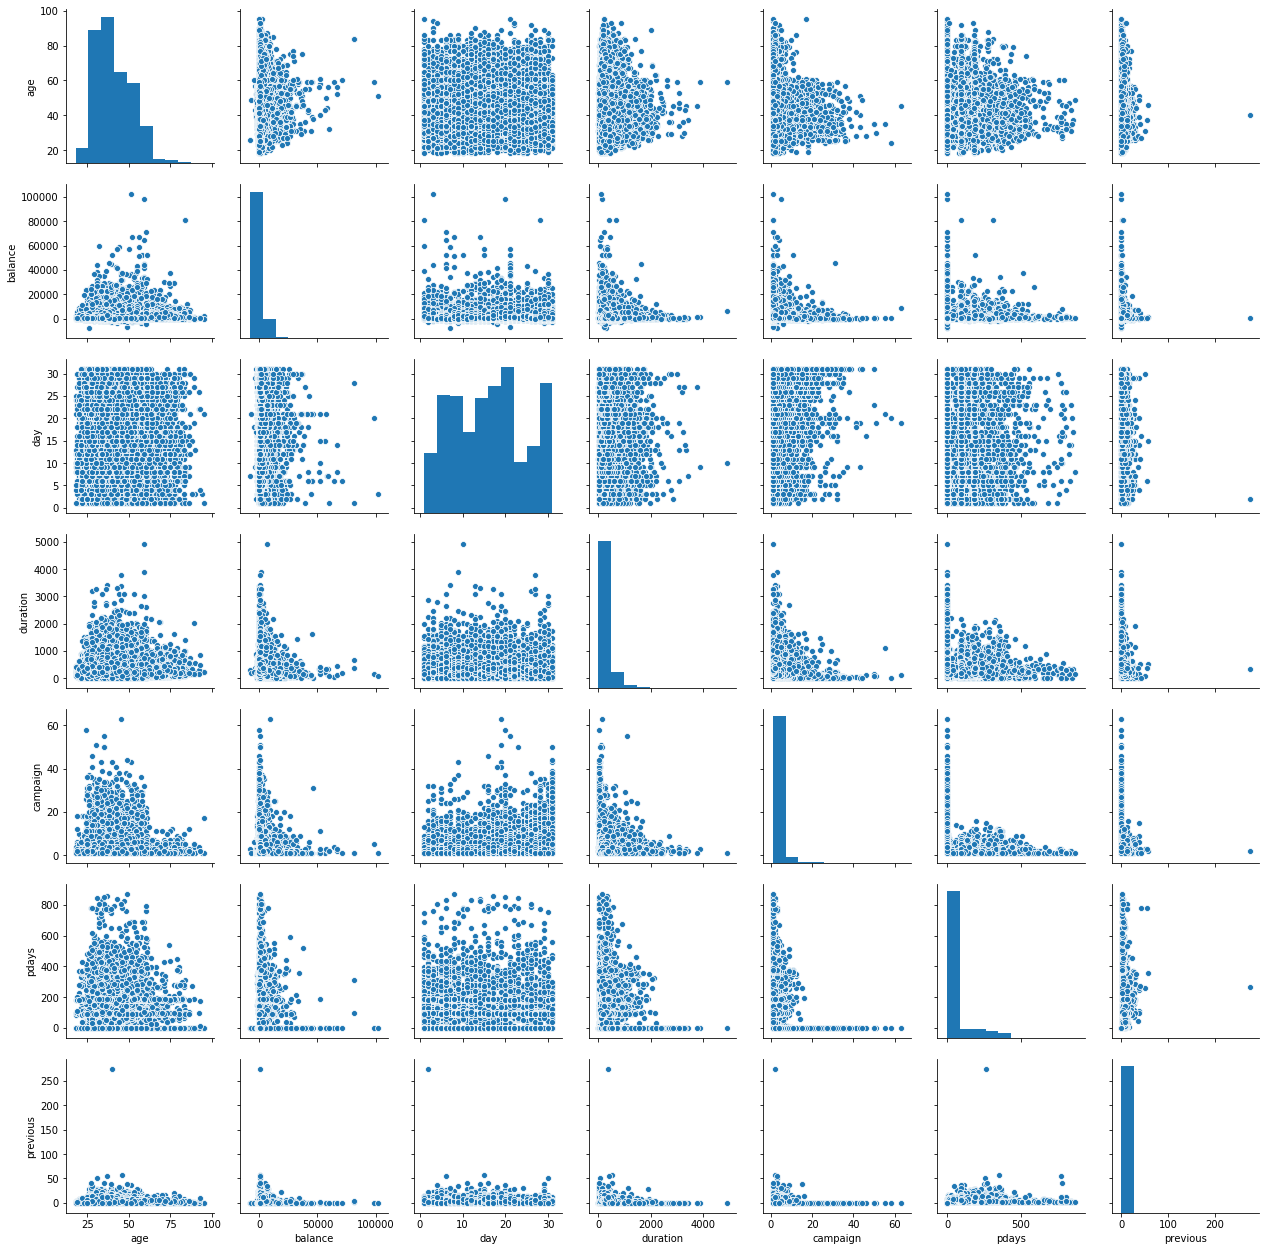

In [4]:
#We can observe that data here is not-symmetric. So let's find out the correlation matrix to look into details.
sns.pairplot(data)

In [5]:
#Correlation Matrix
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


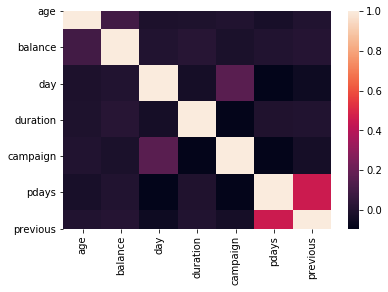

In [6]:
#Correlation Matrix with heatplot
sns.heatmap(data.corr())

In [7]:
#data types listed
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
#We converted the categorical data into numerical data using the get_dummies method.
data_new = pd.get_dummies(data, columns=['job','marital',
                                         'education','default',
                                         'housing','loan',
                                         'contact','month',
                                         'poutcome'])

In [9]:
#Class column into binary format
data_new.y.replace(('yes', 'no'), (1, 0), inplace=True)

In [10]:
#The data has been successfully converted to integer data types and listed.
data_new.dtypes

age                    int64
balance                int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
y                      int64
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
default_no             uint8
default_yes            uint8
housing_no             uint8
housing_yes            uint8
loan_no                uint8
loan_yes               uint8
contact_cellular       uint8
contact_teleph

In [11]:
#Unique education values
data.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [12]:
#yes and no according to education data
pd.crosstab(index=data["education"], columns=data["y"])

y,no,yes
education,,
primary,6260,591
secondary,20752,2450
tertiary,11305,1996
unknown,1605,252


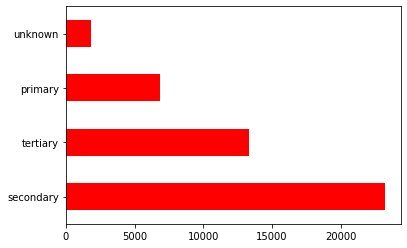

In [13]:
#Education categories and frequency
data.education.value_counts().plot(kind="barh",color="red")

In [14]:
#Unique job values
data.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [15]:
#yes and no according to job data
pd.crosstab(index=data["job"], columns=data["y"])

y,no,yes
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


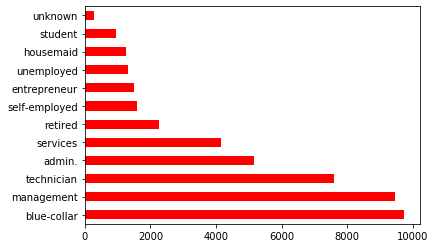

In [16]:
#Job categories and there frequency
data.job.value_counts().plot(kind="barh",color="red")

In [17]:
#Unique marital values
data.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [18]:
#yes and no according to marital data
pd.crosstab(index=data["marital"], columns=data["y"])

y,no,yes
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


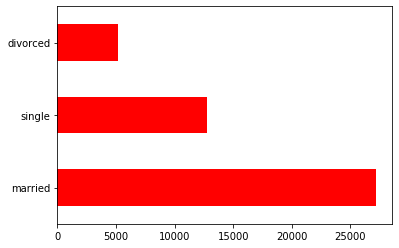

In [19]:
#Marital categories and there frequency
data.marital.value_counts().plot(kind="barh",color="red")

In [20]:
#Unique contact values
data.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [21]:
#yes and no according to contact data
pd.crosstab(index=data["contact"], columns=data["y"])

y,no,yes
contact,,
cellular,24916,4369
telephone,2516,390
unknown,12490,530


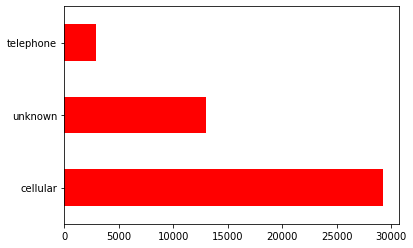

In [22]:
#Contact categories and there frequency
data.contact.value_counts().plot(kind="barh",color="red")

In [23]:
#Unique month values
data.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [24]:
#yes and no according to month data
pd.crosstab(index=data["month"], columns=data["y"])

y,no,yes
month,,
apr,2355,577
aug,5559,688
dec,114,100
feb,2208,441
jan,1261,142
jul,6268,627
jun,4795,546
mar,229,248
may,12841,925


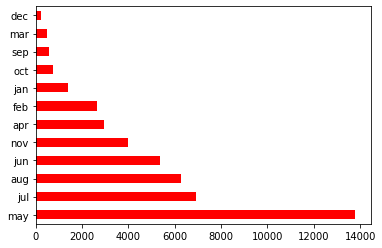

In [25]:
#Months and there frequency
data.month.value_counts().plot(kind="barh",color="red")

In [26]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [27]:
data_new.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [28]:
features_52 = data_new.iloc[:,0:52]
features_52.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


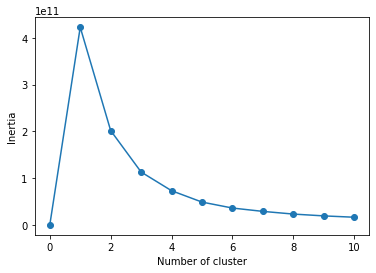

In [29]:
# inertia Kaç küme olması konusunda öneri dirsek noktası yani 2 veya 3 önerilir.
inertia_list = np.empty(11)
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(features_52)
    inertia_list[i] = kmeans.inertia_
plt.plot(range(0,11),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

In [30]:
clustering_kmeans =  KMeans(n_clusters=2, precompute_distances="auto", n_jobs=-1)
data_new['clusters'] = clustering_kmeans.fit_predict(features_52)

In [31]:
# PCA 52 özellik ile iki boyutlu görselleştirme yapabilmek için pca yaptık.
model = PCA()
model.fit(features_52)
transformed = model.transform(features_52)
print('Principle components count: ',len(model.components_))
print('Principle components: ',model.components_)

Principle components count:  52
Principle components:  [[ 3.41021379e-04  9.99998248e-01  1.22934556e-05 ...  5.49445530e-07
   2.08070141e-06 -3.84076929e-06]
 [-2.79529988e-04 -1.83653936e-03 -9.79993410e-04 ... -1.72990350e-06
   2.90183716e-05 -3.87770256e-06]
 [-2.58427517e-03 -1.13635339e-04 -7.79335610e-03 ...  7.69135861e-04
   4.10167646e-04 -3.35562872e-03]
 ...
 [-0.00000000e+00 -3.55029212e-20 -2.62757319e-17 ... -7.74749347e-02
  -7.74749347e-02 -7.74749347e-02]
 [-0.00000000e+00 -3.39871970e-20 -1.97019430e-18 ... -1.92888428e-02
  -1.92888428e-02 -1.92888428e-02]
 [-0.00000000e+00 -3.56812629e-20  2.40115206e-15 ...  6.33264706e-02
   6.33264706e-02  6.33264706e-02]]


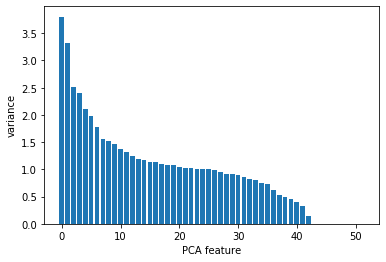

In [32]:
# PCA variance göre 42 özelliğin veriyi temsil gücü var o yüzden 52 özellikten 42 tanesini kullanacağız clustering yaparken.
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler,pca)
pipeline.fit(features_52)

plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

In [33]:
features_42 = data_new.iloc[:,0:42]
features_42.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,33,2,5,76,1,-1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [34]:
reduced_data = PCA(n_components = 2).fit_transform(features_42)

In [35]:
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

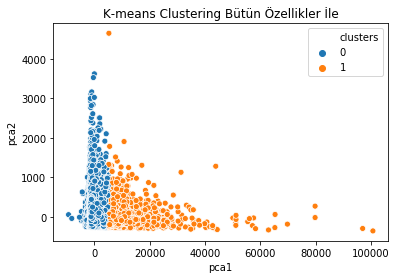

In [36]:
sns.scatterplot(x="pca1", y="pca2", hue=data_new['clusters'], data=results)
plt.title('K-means Clustering Bütün Özellikler İle')
plt.show()

Bakiye ve yaş durumuna göre müşteri kümeleme.

In [37]:
features_AgeBalance = data_new.iloc[:,0:2]
features_AgeBalance.head()

,age,balance
0,58,2143
1,44,29
2,33,2
3,47,1506
4,33,1


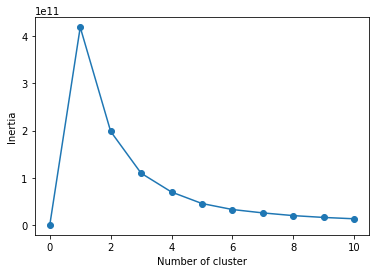

In [38]:
# inertia Kaç küme olması konusunda öneri
inertia_list = np.empty(11)
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(features_AgeBalance)
    inertia_list[i] = kmeans.inertia_
plt.plot(range(0,11),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

In [39]:
clustering_kmeans =  KMeans(n_clusters=2, precompute_distances="auto", n_jobs=-1)
features_AgeBalance['clusters'] = clustering_kmeans.fit_predict(features_AgeBalance)

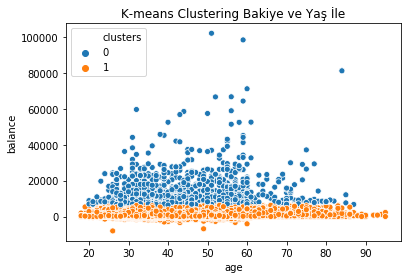

In [40]:
sns.scatterplot(x=features_AgeBalance['age'], y=features_AgeBalance['balance'], hue=features_AgeBalance['clusters'], data=results)
plt.title('K-means Clustering Bakiye ve Yaş İle')
plt.show()

yaş ve önceden kabul ettiği kampanya durumuna göre kümeleme.

In [41]:
feature_Age = data_new.iloc[:,0:1]
feature_Age.head()

,age
0,58
1,44
2,33
3,47
4,33


In [42]:
feature_Campaign = data_new.iloc[:,4:5]
feature_Campaign.head()

,campaign
0,1
1,1
2,1
3,1
4,1


In [43]:
features_AgeCampaign = pd.concat([feature_Age,feature_Campaign],axis=1)
features_AgeCampaign.head()

,age,campaign
0,58,1
1,44,1
2,33,1
3,47,1
4,33,1


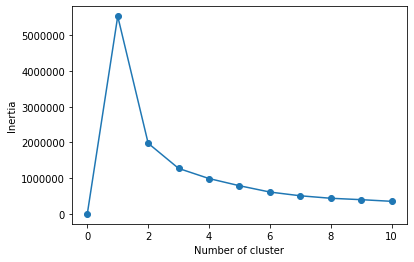

In [44]:
# inertia Kaç küme olması konusunda öneri
inertia_list = np.empty(11)
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(features_AgeCampaign)
    inertia_list[i] = kmeans.inertia_
plt.plot(range(0,11),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

In [45]:
clustering_kmeans =  KMeans(n_clusters=2, precompute_distances="auto", n_jobs=-1)
features_AgeCampaign['clusters'] = clustering_kmeans.fit_predict(features_AgeCampaign)

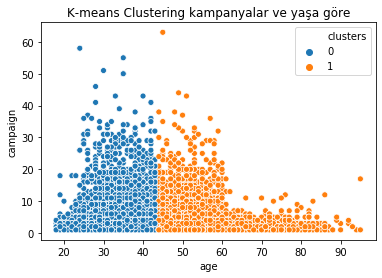

In [46]:
sns.scatterplot(x=features_AgeCampaign['age'], y=features_AgeCampaign['campaign'], hue=features_AgeCampaign['clusters'], data=results)
plt.title('K-means Clustering kampanyalar ve yaşa göre')
plt.show()